In [1]:
%pylab inline

pathMAC="/Users/juanmendezvalderrama/Documents/Proyectos/Moire_TBG_phonons/BM_bandstructure"
pathchow='/home/jfm343/Documents/BM_bandstructure'
pathpc='/home/juan/Documents/Projects/BM_bandstructure'

import numpy as np
import pandas as pd
import os
import sys

mach='pc'

if mach=='Mac':
    pathy=pathMAC
    path_data=pathy+'/data'
    sys.path.insert(0, pathy+'/Mods_disp')
    sys.path.insert(0, pathy+'/Mods_corr')
if mach=='pc':
    pathy=pathpc
    path_data=pathy+'/data'
    sys.path.insert(0, pathy+'/Mods_disp')
    sys.path.insert(0, pathy+'/Mods_corr')

import Dispersion
import MoireLattice
from scipy import linalg as la
import seaborn as sns
from matplotlib.colors import TwoSlopeNorm
from SCF_M_point import Mean_field_M
import pickle
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'],'size'   : 14})
rc('text', usetex=False)
from Eq_time_corrs_M_MF import Eq_time_corrs

Populating the interactive namespace from numpy and matplotlib


In [2]:
Nsamp=4
theta=1.05*np.pi/180  # magic angle
c6sym=True
umkl=0 #the number of umklaps where we calculate an observable ie Pi(q), for momentum transfers we need umkl+1 umklapps when scattering from the 1bz
l=MoireLattice.MoireTriangLattice(Nsamp,theta,0,c6sym,umkl)
lq=MoireLattice.MoireTriangLattice(Nsamp,theta,2,c6sym,umkl) #this one is normalized
[q1,q2,q3]=l.q
q=np.sqrt(q1@q1)

starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.0033273696899414062  s
size of q before symmetr... 16
size of q after symmetr... 19
size of q before symmetr... 16
size of q after symmetr... 19
16 1bz numer of sampling lattice points
19 1bz numer of sampling lattice points c3
19 X numer of sampling lattice points
112 Q numer of sampling lattice points
the shape of the index q array (16, 19)
1 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (16, 1)
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.0033059120178222656  s
size of q before symmetr... 16
size of q after symmetr... 19
size of q before symmetr... 16
size of q after symmetr... 19
16 1bz numer of sampling lattice points
19 1bz numer of sampling lattice points c3
19 X numer of sampling lattice points
112 Q numer of sampling lattice points
the shape of the index q array (16, 19)
1 G numer of sampling r

In [3]:

fullpath=path_data+'/g3_12_2023-04-11-18-56-55/g3_12_1.05/data_mu_0_g2_3.pkl'
# Read the object from the pickle file
with open(fullpath, 'rb') as file:
    B1 = pickle.load(file)


In [4]:
trans_corr=Eq_time_corrs( B1, 'a', 'trans', dir='../data/g3_12_2023-04-10-18-29-58')

qq 0.07676251561000431
the shape of the index qpM array (72, 1042) compare to  72
the shape of the index qpM array (72, 1042) compare to  72
the shape of the index qpM array (72, 1042) compare to  72
11 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 11)
11 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 11)
the shape of the index qpM array (72, 11) compare to  72
the shape of the index qpM array (72, 11) compare to  72
11 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 11)
11 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 11)
11 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (11,)
calculating tensor that stores the overlaps, layer 3, sublattice 1........
finsihed the overlaps.......... 5.016549110412598

In [5]:

phiT=1
T=0.001
res_t=trans_corr.MF_corr_eq( args = (0.0,T,phiT, False) )

starting bubble.......
time for bubble... 25.81669306755066


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern


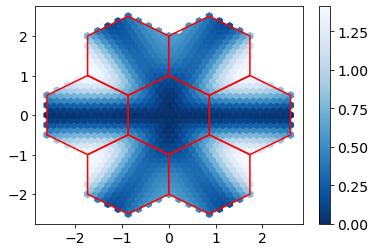

In [6]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=res_t, marker='h', s=50, cmap='Blues_r')
plt.colorbar()

In [7]:
phiT=1
T=0.001
res_tv2=trans_corr.MF_corr_eq_v2( args = (0.0,T,phiT, False) )

starting bubble.......
time for bubble... 11.492921113967896


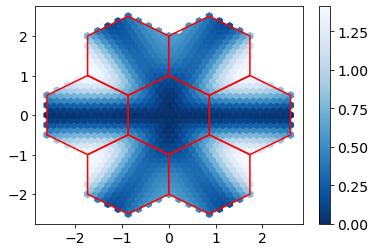

In [8]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=res_tv2, marker='h', s=50, cmap='Blues_r')
plt.colorbar()

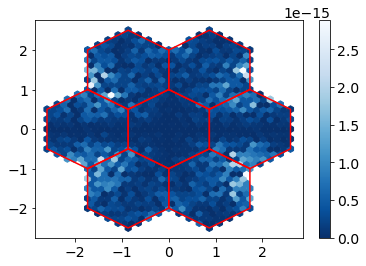

In [9]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=np.abs(res_t-res_tv2), marker='h', s=50, cmap='Blues_r')
plt.colorbar()

In [10]:
phiT=0.02
T=0.001
res_tv2=trans_corr.MF_corr_eq_back_v1( args = (0.0,T,phiT, False) )

starting bubble.......
time for bubble... 0.11375284194946289


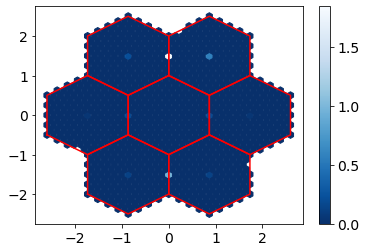

In [11]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=res_tv2, marker='h', s=50, cmap='Blues_r')
plt.colorbar()

In [53]:
phiT=0.004
T=0.001
res_tv2=trans_corr.MF_corr_eq_back_v2( args = (0.0,T,phiT, False) )

starting bubble.......
time for bubble... 0.1905074119567871


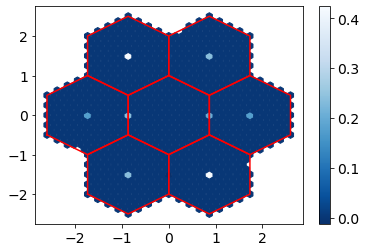

In [54]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=np.real(res_tv2), marker='h', s=50, cmap='Blues_r')
plt.colorbar()

In [25]:
# phiT=1
# T=0.001
# res_phi_trans=[]
# Phis=np.linspace(0,0.01, 11)
# for phiT in Phis:
#     res_t=trans_corr.MF_corr_eq( args = (0.0,T,phiT, False) )
#     res_phi_trans.append(res_t)

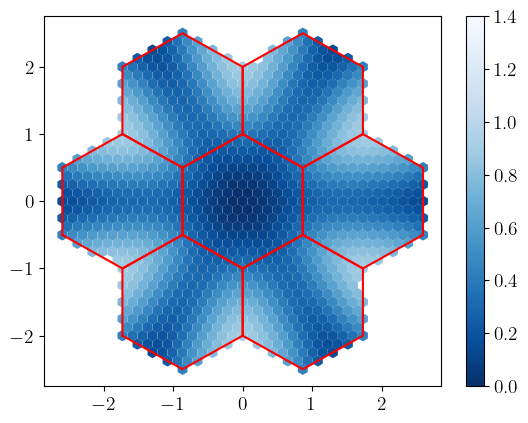

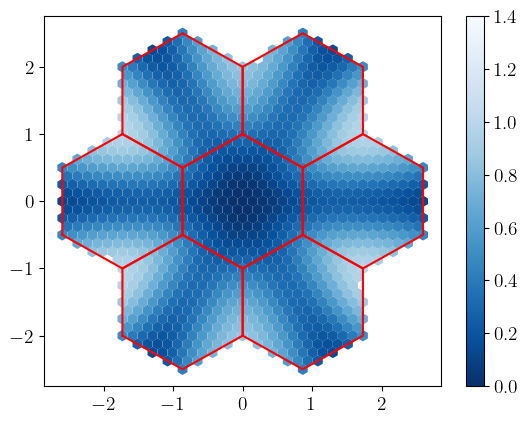

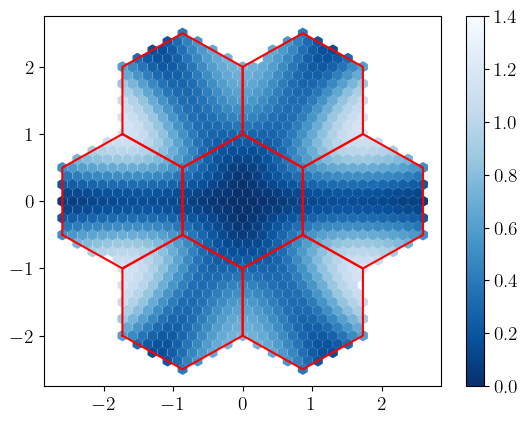

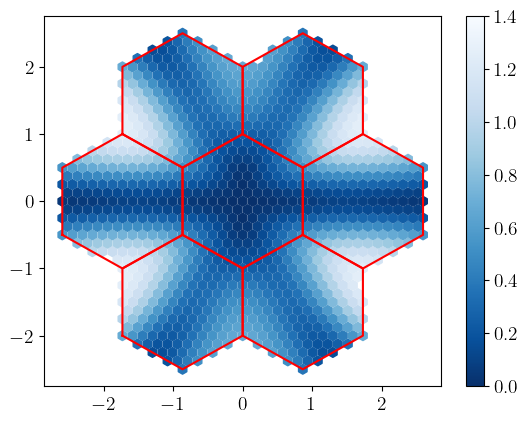

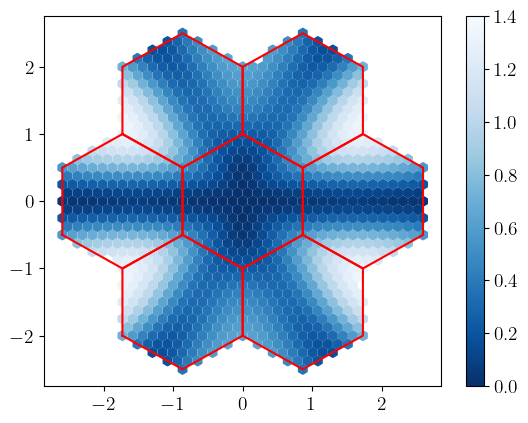

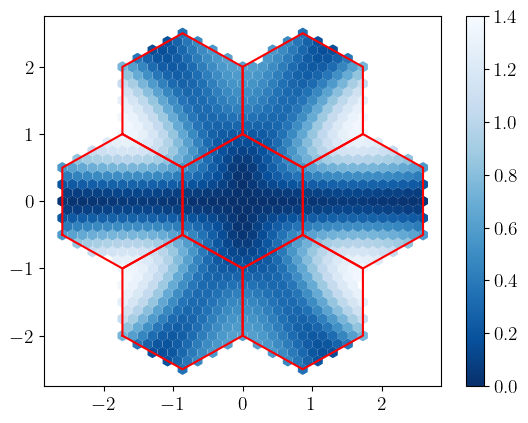

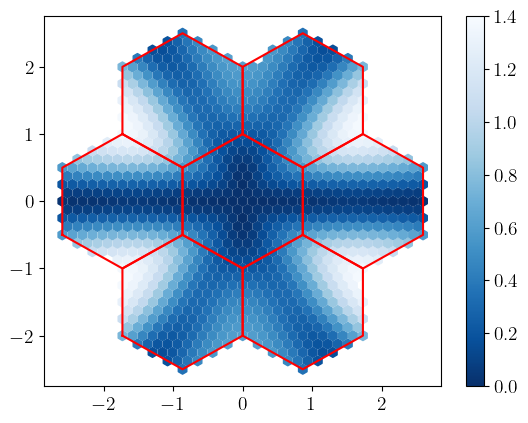

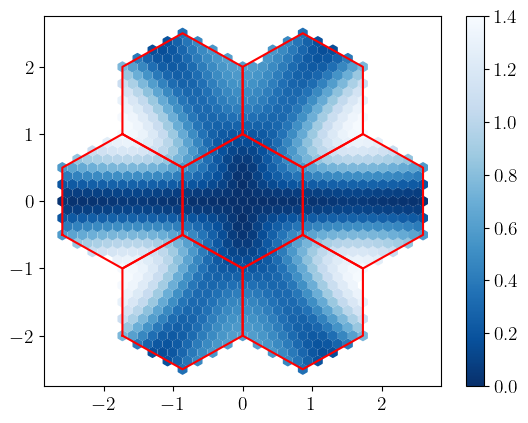

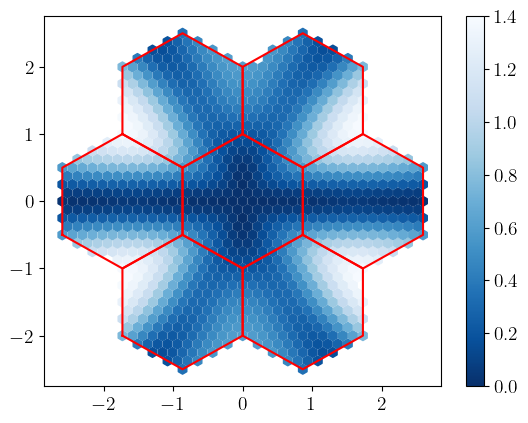

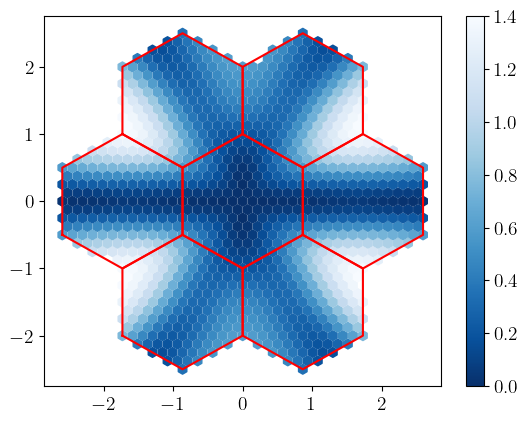

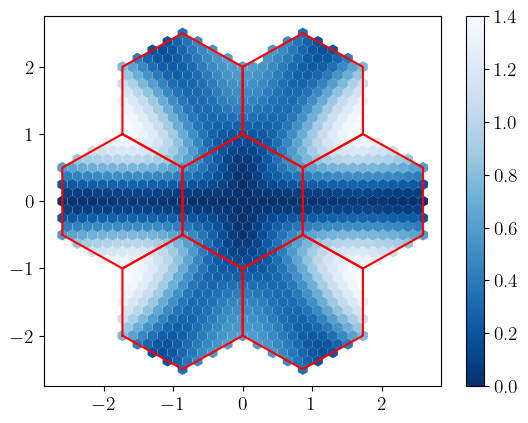

In [ ]:
# bs=lq.boundary()
# [GM1,GM2]=lq.GMvec
# mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
# for i,phiT in enumerate(Phis):
#     for mult in mults:
#         plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')


#     plt.scatter(B1.latt.KX,B1.latt.KY, c=res_phi_trans[i], marker='h', s=50, cmap='Blues_r', vmin=0, vmax=1.4)
#     plt.colorbar()
#     plt.show()

In [ ]:
phiT=0
T=0.001
res_t0=trans_corr.MF_corr_eq( args = (0.0,T,phiT, False) )

starting bubble.......
time for bubble... 10.005905866622925


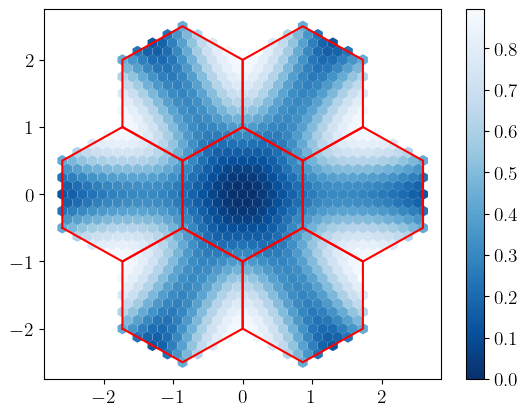

In [ ]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=res_t0, marker='h', s=50, cmap='Blues_r')
plt.colorbar()

In [ ]:
phiT=0
T=0.01
res_t02=trans_corr.corr_eq( args = (0.0,T,False) )

starting bubble.......
time for bubble... 4.001183986663818


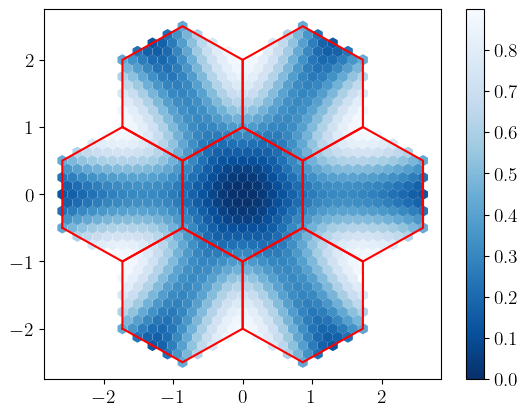

In [ ]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=res_t02, marker='h', s=50, cmap='Blues_r')
plt.colorbar()

In [28]:
subl_corr=Eq_time_corrs( B1, 's', 'subl', dir='../data/g3_12_2023-04-10-18-29-58')

qq 0.07676251561000431
the shape of the index qpM array (72, 1042) compare to  72
the shape of the index qpM array (72, 1042) compare to  72
the shape of the index qpM array (72, 1042) compare to  72
11 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 11)
11 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 11)
the shape of the index qpM array (72, 11) compare to  72
the shape of the index qpM array (72, 11) compare to  72
11 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 11)
11 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 11)
11 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (11,)
calculating tensor that stores the overlaps, layer 0, sublattice 3........
finsihed the overlaps.......... 4.157292604446411

In [29]:
phiT=1
T=0.001
res_subl=subl_corr.MF_corr_eq( args = (0.0,T,phiT, False) )


starting bubble.......
time for bubble... 26.75816059112549


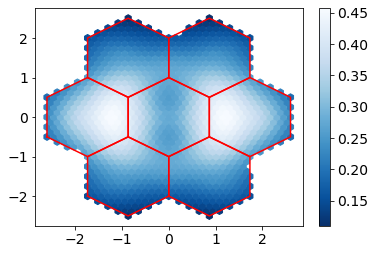

In [30]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=res_subl, marker='h', s=50, cmap='Blues_r')
plt.colorbar()

In [31]:
phiT=1
T=0.001
res_subl=subl_corr.MF_corr_eq_v2( args = (0.0,T,phiT, False) )


starting bubble.......
time for bubble... 11.737419128417969


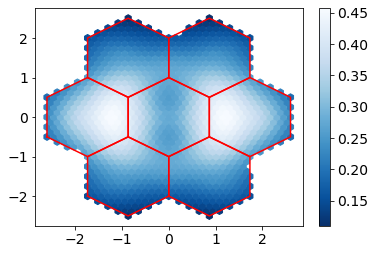

In [32]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=res_subl, marker='h', s=50, cmap='Blues_r')
plt.colorbar()

In [51]:
phiT=0.004
T=0.001
res_tv2=subl_corr.MF_corr_eq_back_v2( args = (0.0,T,phiT, False) )

starting bubble.......
time for bubble... 0.19343829154968262


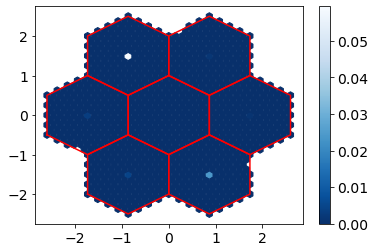

In [52]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=np.abs(res_tv2), marker='h', s=50, cmap='Blues_r')
plt.colorbar()

In [ ]:
# phiT=1
# T=0.001
# res_phi_subl=[]
# Phis=np.linspace(0,0.01, 11)
# for phiT in Phis:
#     res_subl=subl_corr.MF_corr_eq( args = (0.0,T,phiT, False) )
#     res_phi_subl.append(res_subl)

starting bubble.......
time for bubble... 9.989474773406982
starting bubble.......
time for bubble... 10.284321069717407
starting bubble.......
time for bubble... 10.204764127731323
starting bubble.......
time for bubble... 10.208341121673584
starting bubble.......
time for bubble... 10.241618156433105
starting bubble.......
time for bubble... 10.227132320404053
starting bubble.......
time for bubble... 10.185837268829346
starting bubble.......
time for bubble... 10.136716604232788
starting bubble.......
time for bubble... 10.283129930496216
starting bubble.......
time for bubble... 10.121628046035767
starting bubble.......
time for bubble... 10.189280986785889


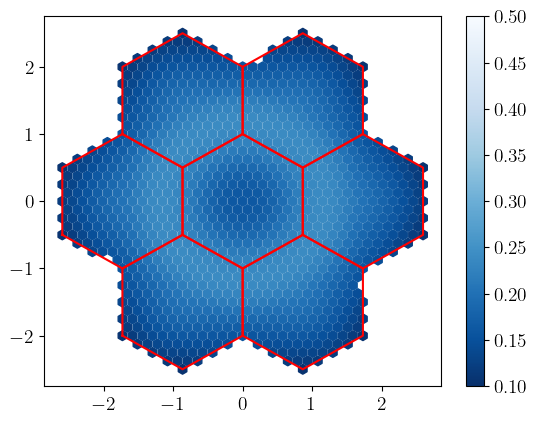

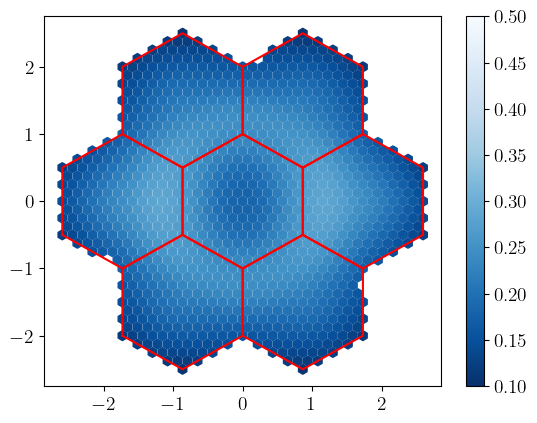

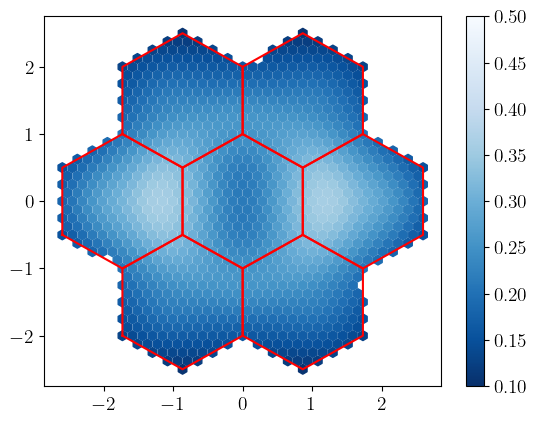

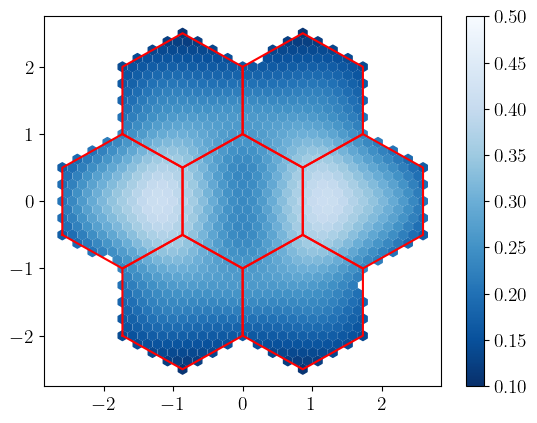

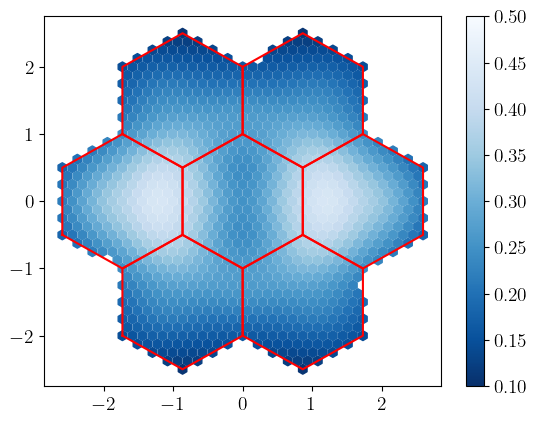

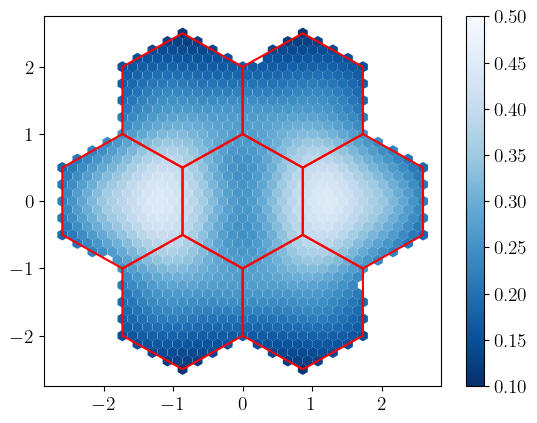

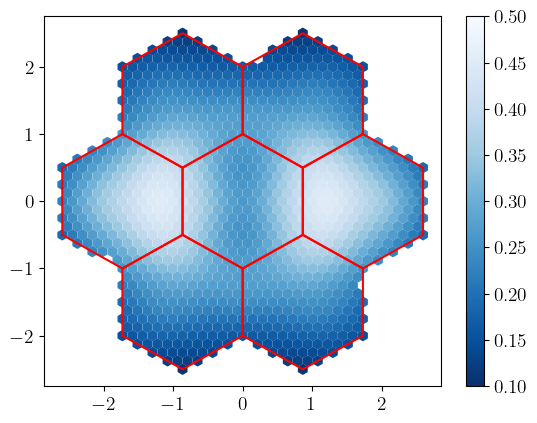

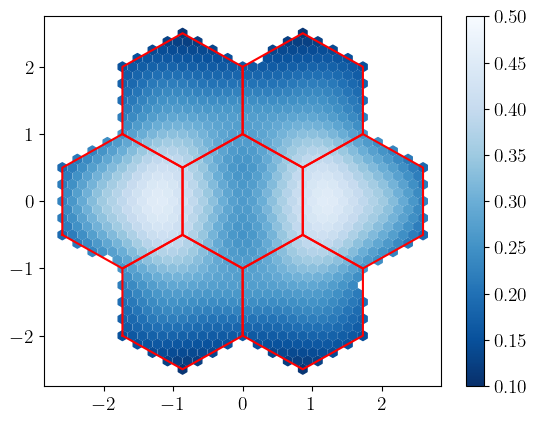

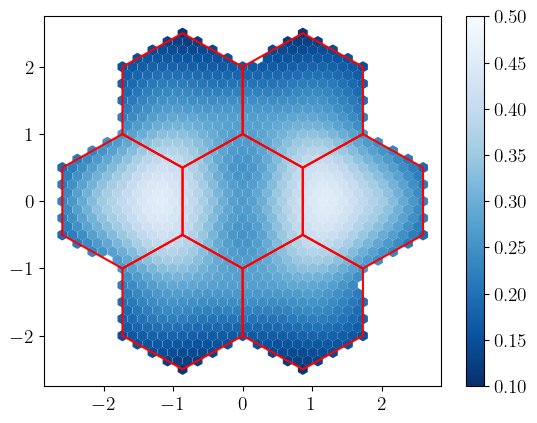

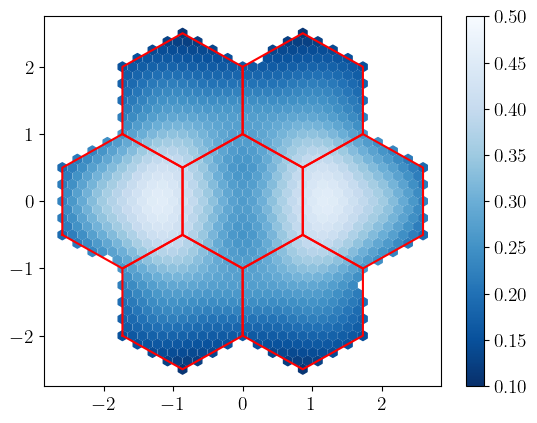

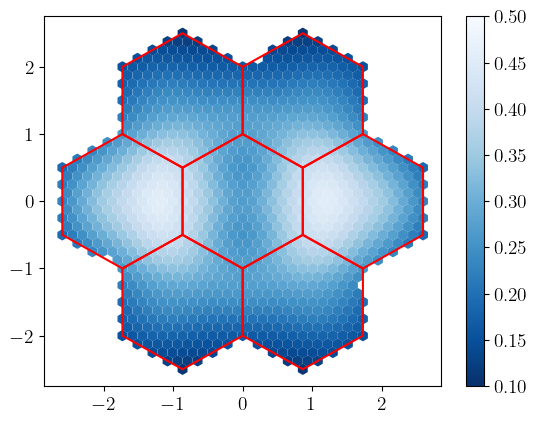

In [ ]:
# bs=lq.boundary()
# [GM1,GM2]=lq.GMvec
# mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
# for i,phiT in enumerate(Phis):
#     for mult in mults:
#         plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')


#     plt.scatter(B1.latt.KX,B1.latt.KY, c=res_phi_subl[i], marker='h', s=50, cmap='Blues_r', vmin=0.1, vmax=.5)
#     plt.colorbar()
#     plt.show()

In [ ]:
phiT=0
T=0.01
res0=subl_corr.MF_corr_eq((0.0,T,phiT))

starting bubble.......
time for bubble... 10.184495210647583


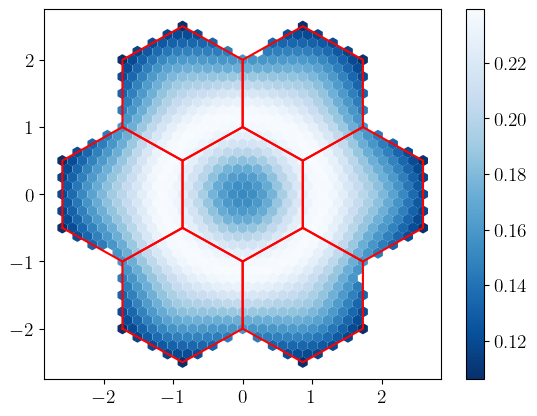

In [ ]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=res0, marker='h', s=50, cmap='Blues_r')
plt.colorbar()

In [ ]:
long_corr=Eq_time_corrs( B1, 'a', 'long', dir='../data/g3_12_2023-04-10-18-29-58')

qq 0.07676251561000431
the shape of the index qpM array (72, 1042) compare to  72
the shape of the index qpM array (72, 1042) compare to  72
the shape of the index qpM array (72, 1042) compare to  72
calculating tensor that stores the overlaps, layer 3, sublattice 1........
finsihed the overlaps.......... 4.626711130142212
calculating tensor that stores the overlaps, layer 3, sublattice 2........
finsihed the overlaps.......... 3.1594109535217285
calculating tensor that stores the overlaps, layer 3, sublattice 1........
finsihed the overlaps.......... 3.4464049339294434
calculating tensor that stores the overlaps, layer 3, sublattice 2........
finsihed the overlaps.......... 2.2401747703552246


In [ ]:
phiT=10
T=0.01
resLong=long_corr.MF_corr_eq((0.0,T,phiT))

starting bubble.......
time for bubble... 10.95482587814331


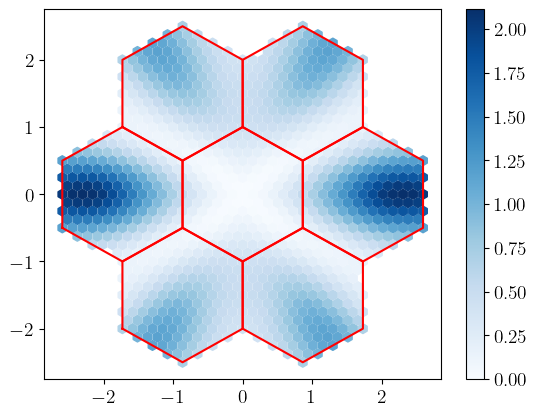

In [ ]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=resLong, marker='h', s=50, cmap='Blues')
plt.colorbar()